In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
test_url = "https://raw.githubusercontent.com/thimmie52/data_org_financial_pred/refs/heads/main/data/test_edited.csv"
train_url = "https://raw.githubusercontent.com/thimmie52/data_org_financial_pred/refs/heads/main/data/train_edited.csv"

In [3]:
df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 34 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   object 
 2   owner_age                                                         9618 non-null   float64
 3   attitude_stable_business_environment                              9616 non-null   object 
 4   attitude_worried_shutdown                                         9616 non-null   object 
 5   compliance_income_tax                                             9614 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          9613 non-null   object 
 7   perception_cannot_afford_insuranc

In [56]:
categorical = [x for x in df_train.columns if df_train[x].dtype == 'object']
numerical = [x for x in df_train.columns if df_train[x].dtype != 'object']

In [6]:
for i in categorical:
  if i != "ID":
    print(f"-----------{i}------------")
    print(df_train[i].value_counts())
    print(f"                 ")

-----------country------------
country
eswatini    2674
zimbabwe    2612
malawi      2388
lesotho     1944
Name: count, dtype: int64
                 
-----------attitude_stable_business_environment------------
attitude_stable_business_environment
Yes                  5820
No                   2451
Don’t know or N/A    1345
Name: count, dtype: int64
                 
-----------attitude_worried_shutdown------------
attitude_worried_shutdown
No                   5804
Yes                  3575
Don’t know or N/A     237
Name: count, dtype: int64
                 
-----------compliance_income_tax------------
compliance_income_tax
No            8010
Yes           1252
Don’t know     341
Refused         11
Name: count, dtype: int64
                 
-----------perception_insurance_doesnt_cover_losses------------
perception_insurance_doesnt_cover_losses
No            4486
Yes           2604
Don't know    2523
Name: count, dtype: int64
                 
-----------perception_cannot_afford_insu

In [7]:
df_chi_square = pd.crosstab(df_train['country'], df_train['Target'])

In [9]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_frequency = chi2_contingency(df_chi_square)

print(f"Chi-square value: {chi2}, p-value: {p_value}")

Chi-square value: 831.6951601979586, p-value: 2.1808094640398105e-176


In [10]:
def calculate_chi_square_value(column, df_to_use):
    df_chi_square = pd.crosstab(df_to_use[column], df_to_use['Target'])
    chi2, p_value, dof, expected_frequency = chi2_contingency(df_chi_square)
    if p_value < 0.05:
        return chi2
    else:
        return 0


In [24]:
chi_square_data = {}
for i in categorical:
  if (i != "ID") and (i != "Target"):
    chi_square_data[i] = calculate_chi_square_value(i, df_train)

In [25]:
chi_square_data

{'country': np.float64(831.6951601979586),
 'attitude_stable_business_environment': np.float64(115.13805611304286),
 'attitude_worried_shutdown': np.float64(68.31183535263773),
 'compliance_income_tax': np.float64(566.7051217025073),
 'perception_insurance_doesnt_cover_losses': np.float64(239.82351043718967),
 'perception_cannot_afford_insurance': np.float64(191.13487776458942),
 'motor_vehicle_insurance': np.float64(612.136353208497),
 'has_mobile_money': np.float64(124.89925793699953),
 'current_problem_cash_flow': np.float64(327.80034932192467),
 'has_cellphone': np.float64(162.75531911127956),
 'owner_sex': np.float64(20.716552580130227),
 'offers_credit_to_customers': np.float64(45.36179988219059),
 'attitude_satisfied_with_achievement': np.float64(41.00758842276572),
 'has_credit_card': np.float64(1438.4714964543934),
 'keeps_financial_records': np.float64(742.6232397416769),
 'perception_insurance_companies_dont_insure_businesses_like_yours': np.float64(420.51005899709537),
 'pe

In [29]:
chi_square_series_value = pd.DataFrame(chi_square_data, index=[0]).T.sort_values(by=0, ascending=True)

In [46]:
chi_square_pd_value = pd.DataFrame({"name": chi_square_series_value.index, "value":chi_square_series_value.values.reshape(1,-1)[0]})

In [47]:
chi_square_pd_value['weight'] = chi_square_pd_value['value'].apply(lambda x: x/chi_square_pd_value['value'].sum() * 100)

In [48]:
chi_square_pd_value

,name,value,weight
0,owner_sex,20.716553,0.155295
1,covid_essential_service,23.043924,0.172741
2,attitude_satisfied_with_achievement,41.007588,0.307400
3,offers_credit_to_customers,45.361800,0.340040
4,attitude_more_successful_next_year,52.662234,0.394765
5,attitude_worried_shutdown,68.311835,0.512078
6,problem_sourcing_money,88.025422,0.659854
7,attitude_stable_business_environment,115.138056,0.863095
8,has_mobile_money,124.899258,0.936267
9,has_cellphone,162.755319,1.220043


<Axes: >

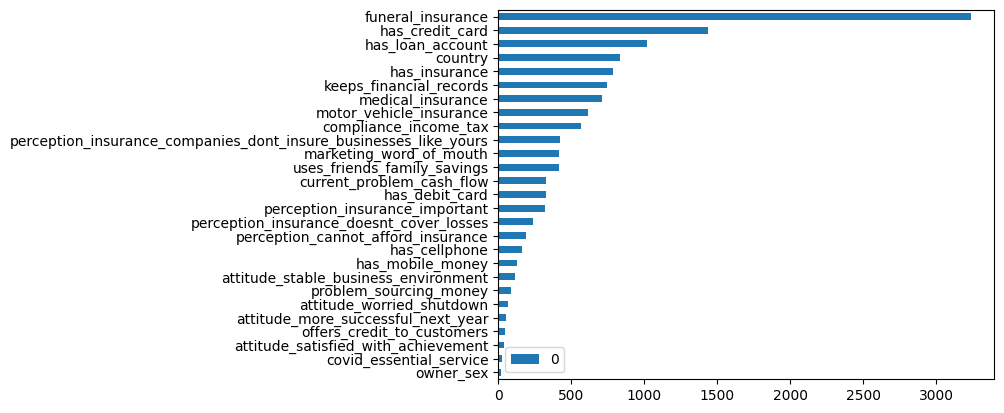

In [30]:
chi_square_series_value.plot(kind='barh')

#### Important features to look into:
  * Funeral Insurance  -  3238
  * Has Credit Card  -  1438
  * Has Loan Amount  -  1019
  * Country  -  831
  * Has Insurance  -  786
  * Keeps Financial records  -  743
  * Medical insurance  -  706
  * Motor Vehicle Insurance  -  612
  * Compliance Income Tax  -  568
  * Perception Insurance Companies  -  420
  * Perception Cannot Afford Insurance	-  191.134878
  * Perception Insurance_doesnt_cover_losses	239.823510
  * Perception Insurance_important	317.799925
  * Has debit card	327.410568
  * Current problem cash flow	327.800349
  * Uses friends family savings	416.298384
  * Marketing word_of mouth	416.675142

In [32]:
categorical

['ID',
 'country',
 'attitude_stable_business_environment',
 'attitude_worried_shutdown',
 'compliance_income_tax',
 'perception_insurance_doesnt_cover_losses',
 'perception_cannot_afford_insurance',
 'motor_vehicle_insurance',
 'has_mobile_money',
 'current_problem_cash_flow',
 'has_cellphone',
 'owner_sex',
 'offers_credit_to_customers',
 'attitude_satisfied_with_achievement',
 'has_credit_card',
 'keeps_financial_records',
 'perception_insurance_companies_dont_insure_businesses_like_yours',
 'perception_insurance_important',
 'has_insurance',
 'covid_essential_service',
 'attitude_more_successful_next_year',
 'problem_sourcing_money',
 'marketing_word_of_mouth',
 'has_loan_account',
 'has_debit_card',
 'medical_insurance',
 'funeral_insurance',
 'uses_friends_family_savings',
 'Target']

In [33]:
savings_and_assets = ['has_debit_card', 'has_cellphone', 'keeps_financial_records', 'uses_friends_family_savings']
debt_and_repayment = ['has_loan_account', 'current_problem_cash_flow', 'problem_sourcing_money', 'offers_credit_to_customers', 'compliance_income_tax']
res_to_shocks = ['has_insurance', 'medical_insurance', 'motor_vehicle_insurance', 'funeral_insurance', 'covid_essential_service', 'attitude_worried_shutdown']
access_to_cred = ['has_credit_card', 'has_mobile_money']

In [59]:
from sklearn.preprocessing import LabelEncoder
import numpy as np # For handling potential new categories

def perform_subtle_group(df, train=True, fitted_encoders=None):
    categorical_cols_to_encode = [c for c in categorical if c not in ['ID', 'Target']]

    df_processed = df.copy()

    if train:
        current_fitted_encoders = {}
        for col in categorical_cols_to_encode:
            le = LabelEncoder()
            # Fit on the column, ensuring 'Missing' is a class if NaNs exist and converting to string
            le.fit(df_processed[col].fillna('Missing').astype(str))
            df_processed[col] = le.transform(df_processed[col].fillna('Missing').astype(str))
            current_fitted_encoders[col] = le # Store the fitted encoder
        return df_processed, current_fitted_encoders # Return both the DataFrame and encoders
    else: # For test set, fitted_encoders must be provided
        if fitted_encoders is None:
            raise ValueError("fitted_encoders must be provided for the test set (train=False).")

        for col in categorical_cols_to_encode:
            if col in fitted_encoders:
                le = fitted_encoders[col]
                test_data_col = df_processed[col].fillna('Missing').astype(str)

                # Identify labels in test data that were not seen during training
                unseen_labels = set(test_data_col.unique()) - set(le.classes_)

                if unseen_labels:
                    # Replace unseen labels with 'Missing' category if 'Missing' was a class during training
                    if 'Missing' in le.classes_:
                        test_data_col = test_data_col.replace(list(unseen_labels), 'Missing')
                    else:
                        # If 'Missing' was never a class in training and new labels appear,
                        # this scenario requires careful consideration. For now, we assume
                        # 'Missing' is always a class due to fillna('Missing') during fit.
                        pass

                df_processed[col] = le.transform(test_data_col)
            else:
                print(f"Warning: Encoder not found for column {col}. Skipping encoding for this column.")
        return df_processed # Only return the DataFrame for the test set

In [60]:
df_subtle, fitted_encoders_train = perform_subtle_group(df_train)

In [61]:
df_subtle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 34 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   int64  
 2   owner_age                                                         9618 non-null   float64
 3   attitude_stable_business_environment                              9618 non-null   int64  
 4   attitude_worried_shutdown                                         9618 non-null   int64  
 5   compliance_income_tax                                             9618 non-null   int64  
 6   perception_insurance_doesnt_cover_losses                          9618 non-null   int64  
 7   perception_cannot_afford_insuranc

np.float64(0.15529496870422438)

In [ ]:
for i in categorical:
  if (i != "ID") and (i != 'Target'):
    df[i] = df[i].apply(lambda x: x * chi_square_pd_value[chi_square_pd_value['name'] == i].weight.values[0])